# Problem Statement

The team at Google Play Store wants to develop a feature that would enable them to boost visibility for the most promising apps. Now, this analysis would require a preliminary understanding of the features that define a well-performing app. You can ask questions like:

Does a higher size or price necessarily mean that an app would perform better than the other apps?
Or does a higher number of installs give a clear picture of which app would have a better rating than others?

In [2]:
import pandas as pd
import numpy as np

In [3]:
inp0=pd.read_csv("googleplaystore_v2.csv")
inp0.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
inp0.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.000000,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19000.000000,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [5]:
inp0.shape
# (rows,columns)
# (records,features)

(10841, 13)

# Data Handling and Cleaning
The first few steps involve making sure that there are no missing values or incorrect data types before we proceed to the analysis stage. These aforementioned problems are handled as follows:

For Missing Values: Some common techniques to treat this issue are
Dropping the rows containing the missing values
Imputing the missing values
Keep the missing values if they don't affect the analysis
Incorrect Data Types:
Clean certain values
Clean and convert an entire column

In [7]:
# incorrect data means
# 1. 25/0
# 2. date formate 25.1.20325 
# 3. Contact number  87598546 / +91-895623658
# 4. Adhara Card    BVPPS0169D 
# 5. Pan Card       1254 6589 5874


In [8]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [8]:
(5000)+(1000)

6000

In [7]:
(10000000)+(5000)

10005000

In [9]:
inp0.isnull().sum()

# ?????

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [10]:
# Drop 
inp1=inp0[~inp0.Rating.isnull()]

In [11]:
inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [12]:
inp1.shape

(9367, 13)

In [13]:
inp1['Rating'].value_counts()

Rating
4.4     1109
4.3     1076
4.5     1038
4.2      952
4.6      823
4.1      708
4.0      568
4.7      499
3.9      386
3.8      303
5.0      274
3.7      239
4.8      234
3.6      174
3.5      163
3.4      128
3.3      102
4.9       87
3.0       83
3.1       69
3.2       64
2.9       45
2.8       42
2.7       25
2.6       25
2.5       21
2.3       20
2.4       19
1.0       16
2.2       14
1.9       13
2.0       12
1.7        8
1.8        8
2.1        8
1.6        4
1.4        3
1.5        3
1.2        1
19.0       1
Name: count, dtype: int64

In [14]:
inp1['Category'].value_counts()

Category
FAMILY                 1747
GAME                   1097
TOOLS                   734
PRODUCTIVITY            351
MEDICAL                 350
COMMUNICATION           328
FINANCE                 323
SPORTS                  319
PHOTOGRAPHY             317
LIFESTYLE               314
PERSONALIZATION         314
BUSINESS                303
HEALTH_AND_FITNESS      297
SOCIAL                  259
SHOPPING                238
NEWS_AND_MAGAZINES      233
TRAVEL_AND_LOCAL        226
DATING                  195
BOOKS_AND_REFERENCE     178
VIDEO_PLAYERS           160
EDUCATION               155
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          109
HOUSE_AND_HOME           76
WEATHER                  75
AUTO_AND_VEHICLES        73
LIBRARIES_AND_DEMO       65
ART_AND_DESIGN           62
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
1.9                       1
Name: count, dtype: int64

In [15]:
inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [15]:
inp1[inp1["Android Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [16]:
inp1.loc[10472,:]
inp1[(inp1['Android Ver'].isnull()& (inp1.Category=='1.9'))]
inp1=inp1[~(inp1['Android Ver'].isnull()& (inp1.Category=='1.9'))]

inp1[inp1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [17]:
inp1['Android Ver'].value_counts()

4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

In [16]:
inp1['Android Ver']=inp1['Android Ver'].fillna(inp1['Android Ver'].mode()[0])

C:\Users\Sachin\AppData\Local\Temp\ipykernel_6964\3229819513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp1['Android Ver']=inp1['Android Ver'].fillna(inp1['Android Ver'].mode()[0])


In [17]:
# 4453 4490
# inp1['Android Ver'][4453]
inp1['Android Ver'][4453]

'4.1 and up'

In [18]:
import pandas as pd

# Create a sample DataFrame
data = {'A': [1, 2, None, 4, 5],
        'B': [None, 6, 7, 8, None],
        'C': [9, None, 11, None, 12]}
df = pd.DataFrame(data)

# Fill missing records with a specific value
df_filled = df.fillna(df.mean())

# Print the original and filled DataFrame
print("Original DataFrame:")
print(df)
print("\nFilled DataFrame:")
print(df_filled)


Original DataFrame:
     A    B     C
0  1.0  NaN   9.0
1  2.0  6.0   NaN
2  NaN  7.0  11.0
3  4.0  8.0   NaN
4  5.0  NaN  12.0

Filled DataFrame:
     A    B          C
0  1.0  7.0   9.000000
1  2.0  6.0  10.666667
2  3.0  7.0  11.000000
3  4.0  8.0  10.666667
4  5.0  7.0  12.000000


In [19]:
inp1['Android Ver'].isnull().sum()

0

In [21]:
inp1['Android Ver'][4490]

# 4453

'4.1 and up'

In [23]:
inp1.Price.value_counts()

Price
0          8719
$2.99       114
$0.99       107
$4.99        70
$1.99        59
           ... 
$299.99       1
$379.99       1
$37.99        1
$18.99        1
$1.20         1
Name: count, Length: 74, dtype: int64

In [24]:
inp1.Price=inp1.Price.apply(lambda x:0 if x=='0' else float(x[1:]))


    

ValueError: could not convert string to float: 'veryone'

In [22]:
inp1.Price.dtype

dtype('O')

In [ ]:
inp1.Review

In [34]:
def fun(x,y):
    x=x+1   
#     8
    y=y+2   
    z=x+y   
    return z

In [35]:
print(fun(7,5))

15


In [39]:
t=lambda x,y: (x+1)+(y+2)
# anonymous function in Python
print(t(7,5))

15


In [ ]:
# 1. decreasing number of codes
# 2. less Memory 

In [25]:
inp1.Reviews=inp1.Reviews.astype("int32")

ValueError: invalid literal for int() with base 10: '3.0M'

In [26]:
inp1.Reviews.describe()

count     9367
unique    5993
top          2
freq        83
Name: Reviews, dtype: object

In [27]:
inp1.Installs.head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [28]:
def clean_installs(val):
    return int(val.replace(",","").replace("+",""))


In [29]:
type(clean_installs("3,000+"))
u=clean_installs("3,000+")
print(u)

3000


In [32]:
3000  + 100000

103000

In [42]:
inp1.Installs=inp1.Installs.apply(clean_installs)

In [33]:
inp1["Installs"]

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10834           500+
10836         5,000+
10837           100+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 9367, dtype: object

In [34]:
# Sanity Check
inp1[(inp1.Reviews>inp1.Installs)].shape

(7357, 13)

In [35]:
inp1[(inp1.Reviews>inp1.Installs)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000.000000,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619.000000,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [38]:
inp1=inp1[(inp1.Reviews<=inp1.Installs)]

In [39]:
inp1[(inp1.Reviews>inp1.Installs)].shape

(0, 13)

In [45]:
inp1[(inp1.Type=='Free')&(inp1.Price>0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


# Outliers Analysis Using Boxplot

# #Now you need to start identifying and removing extreme values or outliers from our dataset. These values can tilt our analysis and often provide us with a biased perspective of the data available. This is where you’ll start utilising visualisation to achieve your tasks. And the best visualisation to use here would be the box plot. Boxplots are one of the best ways of analysing the spread of a numeric variable

Using a box plot you can identify the outliers as follows:

BoxPlots to Identify Outliers

Outliers in data can arise due to genuine reasons or because of dubious entries. In the latter case, you should go ahead and remove such entries immediately. Use a boxplot to observe, analyse and remove them.
In the former case, you should determine whether or not removing them would add value to your analysis procedure.
You can create a box plot directly from pandas dataframe or the matplotlib way 

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

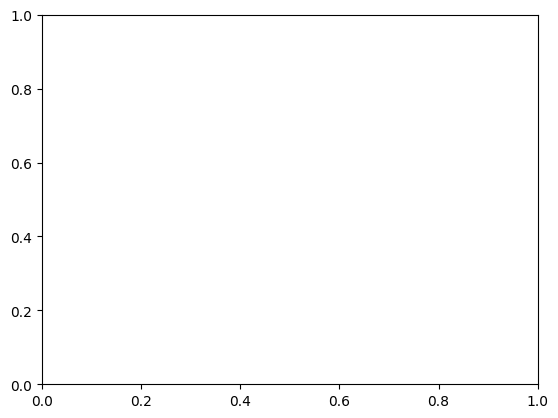

In [41]:
plt.boxplot(inp1.Price)
plt.show()

In [22]:
list1=[2,3,4,7,8,9,10]


In [23]:
list2=[8,13,4,17,8,90,10]
list2.sort()

In [24]:
list2

[4, 8, 8, 10, 13, 17, 90]

In [ ]:
IQR=Q3-Q1=2.5
# IQR=75_percentile - 25_percentile

In [ ]:
Min=Q1-1.5*IQR=4
Min=4
Max=Q3+1.5*IQR
Max=90

In [54]:
arr=[21,20,19,22,23,25,35,41,19,18,20,5]
arr.sort()


In [61]:

import numpy as np

# 1D array
# arr = [20, 2, 7, 1, 34]
print("arr : ", arr)
print("50th percentile of arr : ",
	np.percentile(arr, 50))
print("25th percentile of arr : ",
	np.percentile(arr, 25))
print("75th percentile of arr : ",
	np.percentile(arr, 95))


arr :  [1, 2, 7, 20, 34]
50th percentile of arr :  7.0
25th percentile of arr :  2.0
75th percentile of arr :  31.199999999999996


In [60]:
IIT Jee we are qualifying the students above 75%
50/100

100/100
100/100
95/100
85/100
76/100
75/100
72/100
72/100
72/100
72/100
71/100
65/100
55/100
45/100


SyntaxError: invalid syntax (4033075809.py, line 1)

In [57]:
# Python Program illustrating
# numpy.percentile() method

import numpy as np

# 1D array
arr = [20, 2, 7, 1, 34]
print("arr : ", arr)
print("50th percentile of arr : ",
	np.percentile(arr, 50))
print("25th percentile of arr : ",
	np.percentile(arr, 25))
print("75th percentile of arr : ",
	np.percentile(arr, 75))


arr :  [20, 2, 7, 1, 34]
50th percentile of arr :  7.0
25th percentile of arr :  2.0
75th percentile of arr :  20.0


In [58]:
arr = [20, 2, 7, 1, 34]
arr.sort()

In [59]:
arr

[1, 2, 7, 20, 34]

In [56]:
(20+21)/2

20.5

In [ ]:
22, 23, 25, 35, 41

In [ ]:
5, 18, 19, 19, 20

In [26]:
class_bca

[5, 18, 19, 19, 20, 20, 21, 22, 23, 25, 35, 41]

In [27]:
Min=18
Max=25

In [28]:
inp1[inp1.Price>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [29]:
inp1=inp1[inp1.Price>200]

In [31]:
inp1.Price.describe()

count     15.000000
mean     391.324000
std       25.875398
min      299.990000
25%      399.990000
50%      399.990000
75%      399.990000
max      400.000000
Name: Price, dtype: float64

<AxesSubplot:>

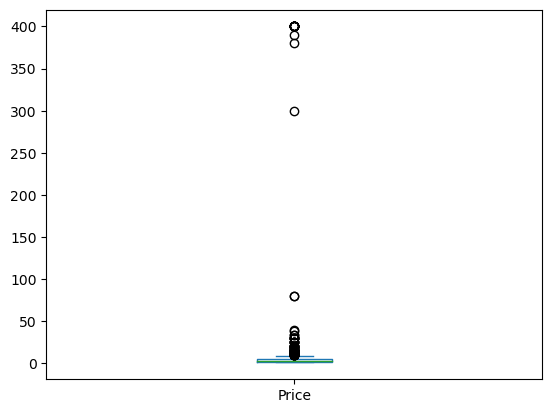

In [47]:
inp1[inp1.Price>0].Price.plot.box()

In [48]:
inp1=inp1[inp1.Price>30]
inp1.shape

(21, 13)

# Histograms

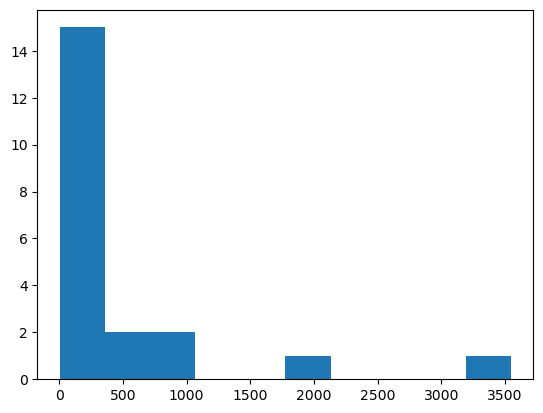

In [49]:
plt.hist(inp1.Reviews)
plt.show()

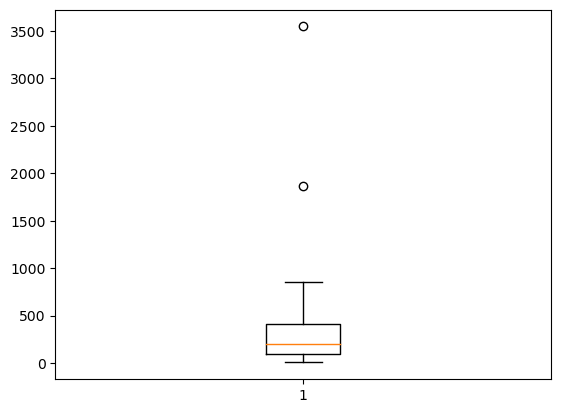

In [50]:
plt.boxplot(inp1.Reviews)
plt.show()

In [53]:
inp1[inp1.Reviews>=100]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2301,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2402,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up
5360,I am Rich Person,LIFESTYLE,4.2,134,1800.0,1000,Paid,37.99,Everyone,Lifestyle,"July 18, 2017",1.0,4.0.3 and up


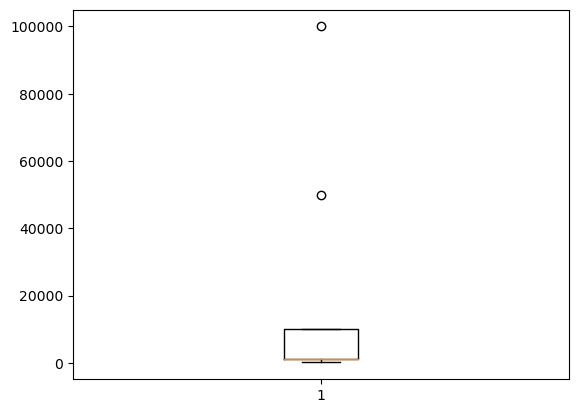

In [62]:
plt.boxplot(inp1.Installs)
plt.show()

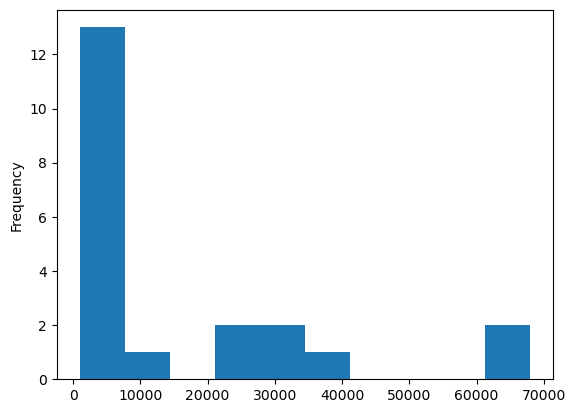

In [63]:
inp1.Size.plot.hist()
plt.show()